In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
main = '/home/golos/Main/Simulations/Patterns/withP_forTend_pC/Cand_X/'
pars = Te.findParameters(main)
NP = len(pars['P'])

In [3]:
AllPatts, AllTends = [], []
for P in pars['P']:
    endAd = '_P_%.2f_G_%.2f.npy' %(P, pars['G'][0])
    pattAd = main + 'patterns' + endAd
    tendAd = main + 'tendances' + endAd
    
    AllPatts.append(Te.data2array(pattAd))
    AllTends.append(Te.data2array(tendAd))

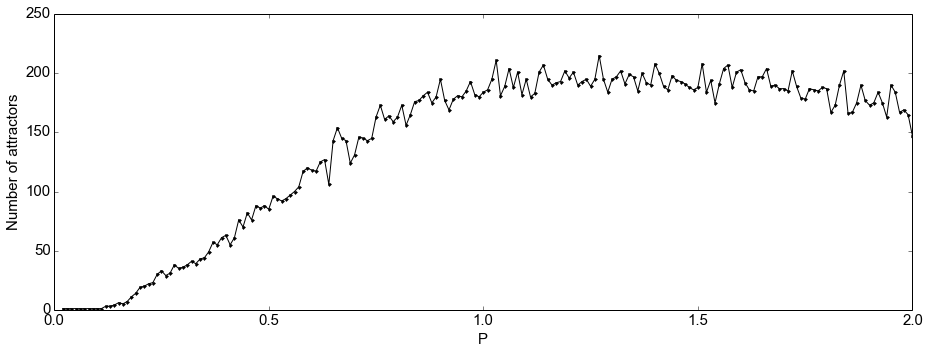

In [4]:
lens = []
for ip in range(NP):
    lens.append(len(AllPatts[ip]))

figure(figsize=(13,5))
plot(pars['P'], lens, '.-k')
xlabel('P', fontsize=15)
ylabel('Number of attractors', fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
tight_layout()
show()

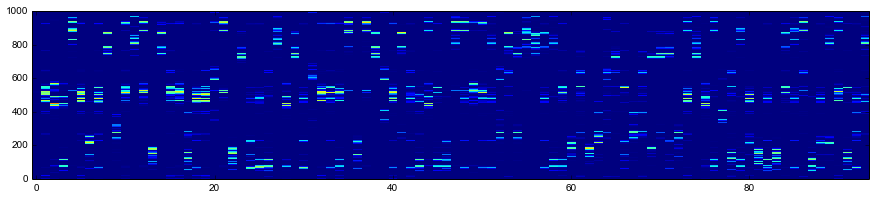

In [5]:
figure(figsize=((15,3)))
imshow(AllPatts[50].T, aspect='auto', interpolation='nearest', origin='bottom') ; show()

In [8]:
# 1h
Td.tic()
freqAssoc, PvalAssoc = Tf.winClus2StackHist42(AllPatts, AllTends, sim_coef=0.91, sim_func=Tf.similAndPear, rnorm=3300.)
Td.tac()
print 'Number of Patterns:', len(freqAssoc)

In [7]:
Te.array2data(freqAssoc, main + 'toStack_F_0.91_mean.npy')
Te.array2data(PvalAssoc, main + 'toStack_P_0.91_mean.npy')

In [10]:
%pylab tk

Populating the interactive namespace from numpy and matplotlib


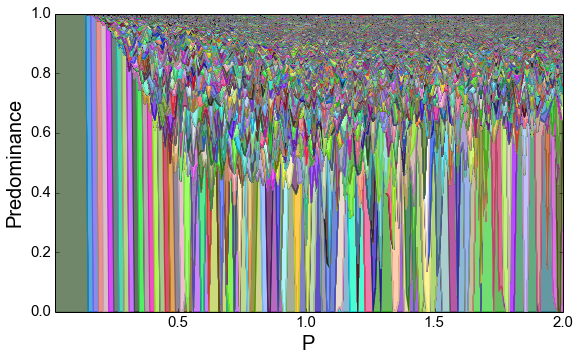

In [8]:
fig = figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlabel('P', fontsize=20)
ax.set_ylabel('Predominance', fontsize=20)
ax.set_ylim((0, 1))
tight_layout()
xticks(fontsize=15)
yticks(fontsize=15)
Td.stackedHistograms(lY=freqAssoc, lX=PvalAssoc, X=pars['P'], ax=ax, 
                     order=Tf.sortByIrregularDimension(freqAssoc, inverse=1)[0])